In [3]:
# ------------------------------------------------------------
# Anomaly Detection using Autoencoder (Credit Card Fraud)
# ------------------------------------------------------------

# a. Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# b. Upload / access the dataset
df = pd.read_csv("creditcard.csv")

# Separate features and labels
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Scale features for stable training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train only on normal (non-fraud) transactions
X_normal = X_scaled[y == 0]

# c. Encoder - compress data into latent representation
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(24, activation='relu')(input_layer)
latent = Dense(14, activation='relu')(encoder)

# d. Decoder - reconstruct input from latent space
decoder = Dense(24, activation='relu')(latent)
output = Dense(input_dim, activation='linear')(decoder)

# Build the Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output)

# e. Compile, train, evaluate
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_normal, X_normal, epochs=20, batch_size=128, shuffle=True, verbose=1)

# Reconstruction on all samples
recon = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled - recon), axis=1)

# Determine threshold (95th percentile of normal errors)
threshold = np.percentile(mse[y == 0], 95)

# Predict anomalies
pred = (mse > threshold).astype(int)

# Evaluate
cm = confusion_matrix(y, pred)
precision = precision_score(y, pred)
recall = recall_score(y, pred)

print("\nConfusion Matrix:\n", cm)
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")


Epoch 1/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 298us/step - loss: 0.4833
Epoch 2/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - loss: 0.2605
Epoch 3/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - loss: 0.2188
Epoch 4/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - loss: 0.1987
Epoch 5/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - loss: 0.1825
Epoch 6/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - loss: 0.1712
Epoch 7/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - loss: 0.1637
Epoch 8/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - loss: 0.1595
Epoch 9/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - loss: 0.1570
Epoch 10/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - loss: 0.1552
Epoch 11/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step - loss: 0.1531
Epoch 12/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - loss: 0.1515
Epoch 13/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - loss: 0.1499
Epoch 14/20
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - loss: 0.1483
E

In [2]:
 pip install scikit-learn


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.6 MB/s  0:00:03 eta 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 2.8 MB/s  0:00:08 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [4]:
## Importing 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, confusion_matrix,recall_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam 


In [5]:
##Loading Dataset and Input
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
## X and y defined
X = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

## Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train on normal data
X_normal = X_scaled[y==0]


In [22]:
##encoding step converting into latent representation
input_dim = X_scaled.shape[1]
input_layer = Input(shape = (input_dim,))
encoder = Dense(24, activation='relu')(input_layer)
latent= Dense(14, activation='relu')(encoder)

In [23]:
##decoding it 
decoder = Dense(24, activation='relu')(latent)
output_layer = Dense(input_dim, activation='linear')(decoder)

In [25]:
##build model
autoencoder = Model(inputs=input_layer, outputs=output_layer)


In [39]:
## Compile, train, evaluate
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_normal, X_normal, epochs=20, batch_size = 128,verbose=0)


In [31]:
##reconstruction
recon = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled-recon), axis =1)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 1s 160us/step


In [33]:
threshold = np.percentile(mse[y==0],95)

pred = (mse>threshold).astype(int)

In [37]:
cm = confusion_matrix(y, pred)
recall = recall_score(y,pred)
precision = precision_score(y,pred)

print(f"\nConfusion Matrix: {cm}")
print(f"\nPrecision: {precision*100: .4f}")
print(f"\nRecall: {recall*100: .4f}")



Confusion Matrix: [[270099  14216]
 [    77    415]]

Precision:  2.8364

Recall:  84.3496


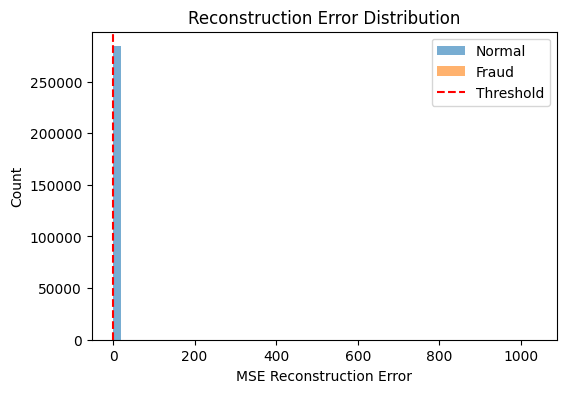

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(mse[y == 0], bins=50, alpha=0.6, label='Normal')
plt.hist(mse[y == 1], bins=50, alpha=0.6, label='Fraud')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE Reconstruction Error")
plt.ylabel("Count")
plt.legend()
plt.show()
